<a href="https://colab.research.google.com/github/jbrenorv/BScFinalProject/blob/main/graficos/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(19680801)

cinza = '#353535'

default_font_family = plt.rcParams['font.family']
default_font_size = plt.rcParams['font.size']
default_text_color = plt.rcParams['text.color']
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.monospace'] = ['Courier New', 'Consolas', 'DejaVu Sans Mono']
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = cinza

linestyles = ['solid', 'dotted', 'dashed', 'dashdot']

df_geral = pd.read_csv('https://raw.githubusercontent.com/jbrenorv/BScFinalProject/refs/heads/main/output/geral.csv')

dado_label_map = {
    'comparacoes': 'Comparações',
    'movimentacoes': 'Movimentações',
    'tempo': 'Tempo em segundos'
}

tipo_label_map = {
    0: 'Crescente',
    1: 'Decrescente',
    2: 'Pseudoaleatório'
}

## Funções

In [ ]:
def setup_ax_colors(ax):
  ax.tick_params(axis='x', colors=cinza)
  ax.tick_params(axis='y', colors=cinza)
  ax.spines['bottom'].set_color(cinza)
  ax.spines['top'].set_color(cinza)
  ax.spines['left'].set_color(cinza)
  ax.spines['right'].set_color(cinza)

In [ ]:
def plot_xy(titulo, grupos, ydata, df):
  fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8, 3))

  for tipo, algoritmos in enumerate(grupos):
    axes[tipo].set_title(tipo_label_map[tipo])
    setup_ax_colors(axes[tipo])

    for i, algoritmo in enumerate(algoritmos):
      d = df[(df.algoritmo == algoritmo[0]) & (df.tipo == tipo)]
      medias = d.groupby('tamanho')[ydata].mean().reset_index()
      label = "\n".join(algoritmo)
      axes[tipo].plot(
          medias['tamanho'],
          medias[ydata],
          label=label,
          # linestyle=linestyles[i],
          linewidth=1.0,
          # color=cinza
          )

    axes[tipo].legend(loc='upper left')

  plt.tight_layout()
  plt.savefig(f'{titulo.split(" ")[1]}.{ydata}.pdf'.lower())
  plt.show()

In [ ]:
def h_ordena(n, h, v):
  for i in range(h, n):
    chave = v[i]
    j = i
    while j >= h and v[j - h] > chave:
      v[j] = v[j - h]
      j -= h
    v[j] = chave;

In [ ]:
def imprime_shellsort_progrecao_h():
  max_value = 900
  n = 100
  x = range(n)
  y = np.random.randint(max_value, size=n)
  ciura_seq = [57, 23, 10, 4, 1]

  fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(6.4, 4.26))
  idx = lambda i: 0 if i < 3 else 1

  setup_ax_colors(axes[0][0])
  axes[0][0].set_title('Vetor original')
  axes[0][0].plot(x, y, 'o', ms=2, color=cinza)

  # shellsort
  for i, h in enumerate(ciura_seq, 1):
    h_ordena(n, h, y)

    setup_ax_colors(axes[idx(i)][i % 3])
    axes[idx(i)][i % 3].set_title(f'{h}-ordenado')
    axes[idx(i)][i % 3].plot(x, y, 'o', ms=2, color=cinza)

  plt.tight_layout()
  plt.savefig('shellsort.pdf')
  plt.show()

In [ ]:
# ref.: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/zoom_inset_axes.html
def imprime_quicksort_insercao_comparacao():
  qi_df = pd.read_csv('https://raw.githubusercontent.com/jbrenorv/ordenacao/refs/heads/main/output/quicksort-insercao.csv')
  ydata = 'movimentacoes'

  fig, ax = plt.subplots(figsize=(5, 4))
  plt.title('Tamanho × Movimentações')

  for i, algoritmo in enumerate(['Insercao', 'Quicksort']):
      d = qi_df[(qi_df.algoritmo == algoritmo)].groupby('tamanho')[ydata].mean().reset_index()
      ax.plot(d['tamanho'], d[ydata], label=algoritmo, linestyle=linestyles[i], linewidth=1.0, color=cinza)

  axins = ax.inset_axes([0.15, 0.5, 0.47, 0.47])
  for i, algoritmo in enumerate(['Insercao', 'Quicksort']):
      d = qi_df[(qi_df.algoritmo == algoritmo)].groupby('tamanho')[ydata].mean().reset_index()
      axins.plot(d['tamanho'], d[ydata], linestyle=linestyles[i], linewidth=1.0, color=cinza)

  axins.set_xlim(1, 30)
  subset = qi_df[(qi_df['tamanho'] >= 1) & (qi_df['tamanho'] <= 30)]
  ymin = subset[ydata].min()
  ymax = subset[ydata].max()
  axins.set_ylim(ymin, ymax)
  axins.set_xticklabels([])
  axins.set_yticklabels([])
  ax.indicate_inset_zoom(axins, edgecolor="black")

  ax.legend(loc='lower right')
  plt.tight_layout()
  plt.savefig('quicksort-insercao.pdf')
  plt.show()

In [ ]:
def ParticionaAleatorio(l, r, v):
  pivo, j, k = v[r], l, random.randint(l, r)
  v[k], v[r] = v[r], v[k]
  n_trocas = 1
  for i in range(l, r):
    if v[i] <= pivo:
      v[i], v[j] = v[j], v[i]
      n_trocas += 1
      j += 1
  v[r], v[j] = v[j], pivo
  return n_trocas

def MoveMedianaFim(l, r, v):
  n_trocas, m = 0, (l + r) // 2
  if v[l] < v[m]:
    v[l], v[m] = v[m], v[l]
    n_trocas += 1
  if v[r] < v[m]:
    v[r], v[m] = v[m], v[r]
    n_trocas += 1
  if v[l] < v[r]:
    v[l], v[r] = v[r], v[l]
    n_trocas += 1
  return n_trocas

def ParticionaMediana(l, r, v):
  n_trocas = MoveMedianaFim(l, r, v)
  pivot, i, j = v[r], l - 1, r + 1
  while True:
    while True:
      j -= 1
      if v[j] <= pivot: break
    while True:
      i += 1
      if v[i] >= pivot: break
    if i >= j: break
    v[i], v[j] = v[j], v[i]
    n_trocas += 1
  return n_trocas

In [ ]:
def imprime_particiona_comparacao():
  tamanhos = range(17, 101)
  p1 = []
  p2 = []
  for t in tamanhos:
    media_p1 = 0
    media_p2 = 0
    for _ in range(10):
      v = np.random.randint(100000, size=t)
      v_copia = v.copy()
      media_p1 += ParticionaAleatorio(0, t - 1, v)
      media_p2 += ParticionaMediana(0, t - 1, v_copia)
    media_p1 /= 10
    media_p2 /= 10
    p1.append(media_p1)
    p2.append(media_p2)


  fig, ax = plt.subplots(figsize=(4, 3))
  plt.title('Tamanho × Trocas')

  ax.plot(tamanhos, p1, label='Particiona', linestyle=linestyles[0], linewidth=1.0, color=cinza)
  ax.plot(tamanhos, p2, label='Particiona2', linestyle=linestyles[1], linewidth=1.0, color=cinza)

  ax.legend(loc='upper left')
  plt.tight_layout()
  plt.savefig('particiona_1_2.pdf')
  plt.show()

In [ ]:
def imprime_resultados_cache(tamanhos, resultados, saida, ylabel):
  x = np.arange(len(tamanhos))
  width = 0.1
  multiplier = 0
  num_groups = len(resultados)

  fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')

  cmap = plt.cm.Set2 #plt.cm.Greys

  atributos = list(resultados.keys())
  tons = cmap(np.linspace(0.3, 0.8, len(atributos)))
  cor_por_atributo = dict(zip(atributos, tons))

  for attribute, measurement in resultados.items():
    offset = width * multiplier
    ax.bar(
      x + offset,
      measurement,
      width,
      label=attribute,
      color=cor_por_atributo[attribute],
      edgecolor='black'
    )
    multiplier += 1

  formatted_size_labels = [f'{s:.0e}' for s in tamanhos]
  center_offset = (width * num_groups) / 2 - (width / 2)
  centered_positions = x + center_offset

  ax.set_xticks(centered_positions, formatted_size_labels)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Tamanho do vetor')
  ax.legend(loc='upper left')

  plt.savefig(saida)

In [ ]:
def plot_xy_2_3(grupos1, grupos2, ydata1, ydata2, ylabel1, ylabel2, filename, df):
  fig, axes = plt.subplots(2, 3, sharey='row', figsize=(8, 6))
  axes[0, 0].set_ylabel(ylabel1)
  axes[1, 0].set_ylabel(ylabel2)
  fig.supxlabel('Tamanho do vetor')
  grupos = [grupos1, grupos2]
  for i, ydata in enumerate([ydata1, ydata2]):
    for tipo, algoritmos in enumerate(grupos[i]):
      ax = axes[i][tipo]
      setup_ax_colors(ax)
      if (i == 0):
        titulo = tipo_label_map[tipo]
        ax.set_title(titulo)
      for j, algoritmo in enumerate(algoritmos):
        d = df[(df.algoritmo == algoritmo[0]) & (df.tipo == tipo)]
        medias = d.groupby('tamanho')[ydata].mean().reset_index()
        label = "\n".join(algoritmo)
        ax.plot(
            medias['tamanho'],
            medias[ydata],
            label=label,
            # linestyle=linestyles[j],
            linewidth=1.0,
            # color=cinza
            )
      ax.legend(loc='upper left')
      if i < 1:
        ax.tick_params(labelbottom=False)
  plt.tight_layout()
  plt.savefig(filename)
  plt.show()

In [ ]:
def imprime_frequencia_de_tamanhos_buckets():
  dados_cre = [(0, 1999883), (1, 6000234), (2, 1999883)]
  dados_dec = [(0, 1999793), (1, 6000414), (2, 1999793)]
  dados_ale = [(0, 3934840), (1, 3330043), (2, 1829895), (3, 905222)]

  todos_dados = [dados_cre, dados_dec, dados_ale]

  cmap = plt.cm.Greys

  todos_labels_unicos = set()
  for dados in todos_dados:
    for numero, frequencia in dados:
      todos_labels_unicos.add(str(numero))

  todos_labels_unicos_ordenados = sorted(list(todos_labels_unicos), key=int)

  tons = cmap(np.linspace(0.3, 0.8, len(todos_labels_unicos_ordenados)))
  cor_por_label = dict(zip(todos_labels_unicos_ordenados, tons))

  fig, axs = plt.subplots(1, 3, figsize=(8, 3))
  primeiro_handle_por_label = {}

  for i, dados in enumerate(todos_dados):
    labels_atuais = [str(d[0]) for d in dados]
    sizes_atuais = [d[1] for d in dados]

    cores_atuais = [cor_por_label[label] for label in labels_atuais]

    wedges, pie_texts = axs[i].pie(
      sizes_atuais,
      autopct=None,
      startangle=90,
      colors=cores_atuais,
      wedgeprops={
        'edgecolor': 'black',
        'linewidth': 1,
        'antialiased': True
      }
    )

    axs[i].axis('equal')
    axs[i].set_title(tipo_label_map[i])

    for j, label in enumerate(labels_atuais):
      if label not in primeiro_handle_por_label:
        primeiro_handle_por_label[label] = wedges[j]

  final_handles = [
    primeiro_handle_por_label[label]
    for label in todos_labels_unicos_ordenados
    if label in primeiro_handle_por_label
  ]

  final_labels = [
    f'{label}'
    for label in todos_labels_unicos_ordenados
    if label in primeiro_handle_por_label
  ]

  final_labels = [l if int(l) < 3 else f'{l}+' for l in final_labels]

  fig.legend(
    final_handles,
    final_labels,
    loc='center right',
    frameon=True
  )

  plt.tight_layout(rect=[0, 0, 0.92, 1])
  plt.savefig('frequencia_buckets.pdf')
  plt.show()

In [ ]:
def plot_xfxlabel(x, fx, label):
  plt.figure()
  plt.plot(x, fx, label=label)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()
  plt.grid(False)
  plt.show()

## Métodos Inferiores

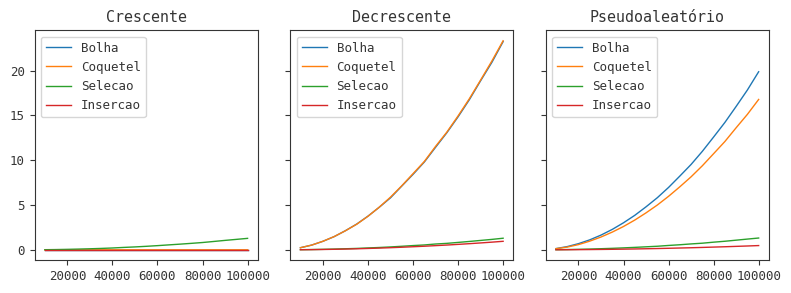

In [ ]:
inf_grupos = [[['Bolha'], ['Coquetel'], ['Selecao'], ['Insercao']]] * 3
plot_xy(titulo='Métodos Inferiores', grupos=inf_grupos, ydata='tempo', df=df_geral)

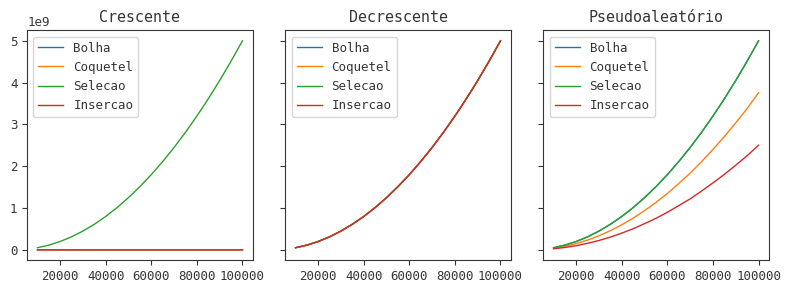

In [ ]:
plot_xy(titulo='Métodos Inferiores', grupos=inf_grupos, ydata='comparacoes', df=df_geral)

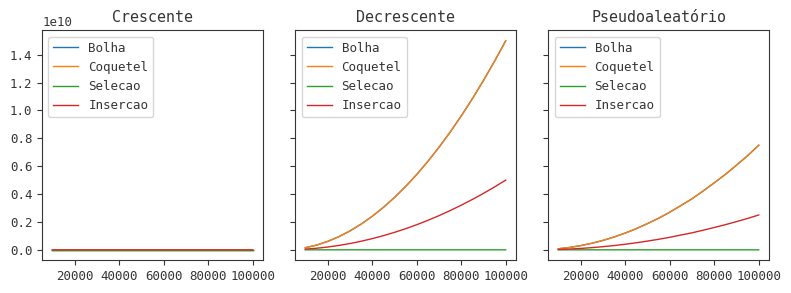

In [ ]:
plot_xy(titulo='Métodos Inferiores', grupos=inf_grupos, ydata='movimentacoes', df=df_geral)

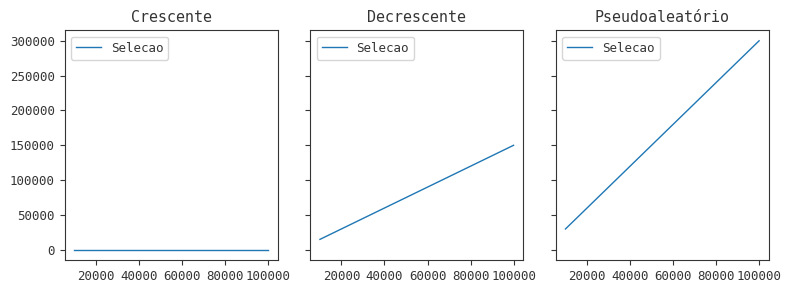

In [ ]:
selecao_movi = [[['Selecao']]] * 3
plot_xy(titulo='_ Selecao', grupos=selecao_movi, ydata='movimentacoes', df=df_geral)

## Métodos Superiores

In [ ]:
# sup_1e4_1e7 = df_geral[df_geral.tamanho <= 10000000] #'https://raw.githubusercontent.com/jbrenorv/BScFinalProject/refs/heads/main/output/superiores_1e4_1e7.csv'
# sup_1e4_1e8 = df_geral #'https://raw.githubusercontent.com/jbrenorv/BScFinalProject/refs/heads/main/output/superiores_1e4_1e8.csv'

df_sup_1e4_1e7 = df_geral[df_geral.tamanho <= 10000000] #pd.read_csv(sup_1e4_1e7)
df_sup_1e4_1e8 = df_geral #pd.read_csv(sup_1e4_1e8)

sup_grupos = [[['Shellsort'], ['Heapsort'], ['Mergesort'], ['Quicksort']]] * 3

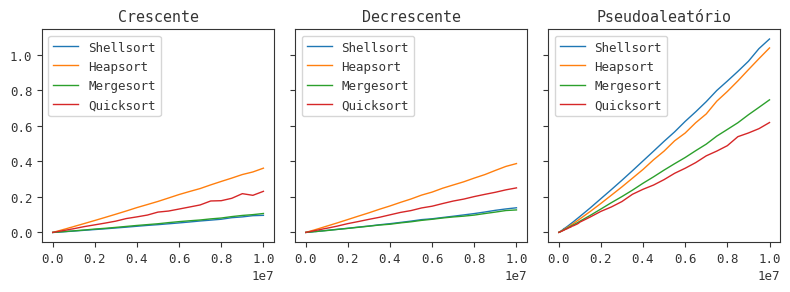

In [ ]:
plot_xy(titulo='Métodos Superiores1e7', grupos=sup_grupos, ydata='tempo', df=df_sup_1e4_1e7)

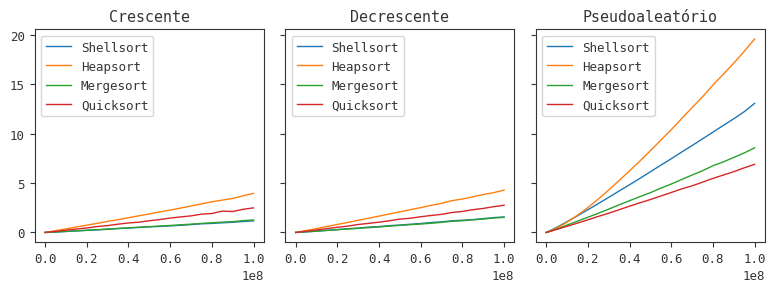

In [ ]:
plot_xy(titulo='Métodos Superiores1e8', grupos=sup_grupos, ydata='tempo', df=df_sup_1e4_1e8)

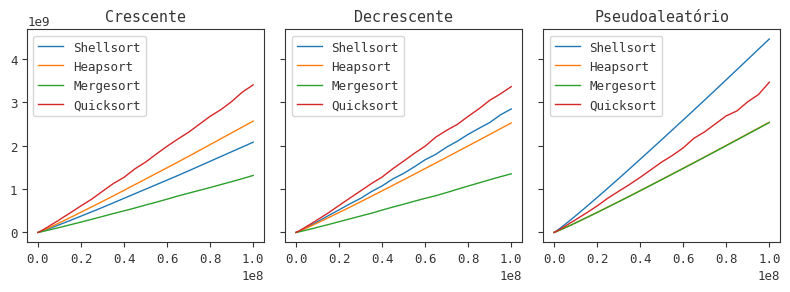

In [ ]:
plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='comparacoes', df=df_sup_1e4_1e8)

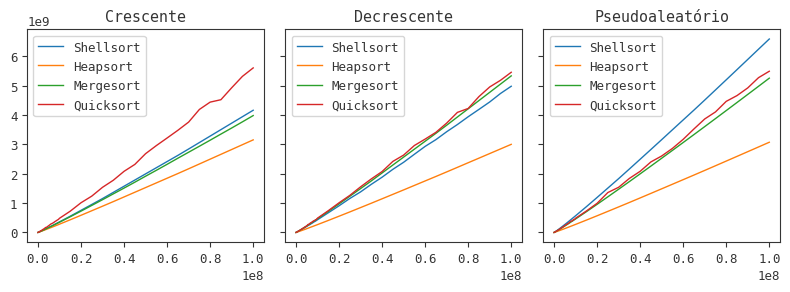

In [ ]:
plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='movimentacoes', df=df_sup_1e4_1e8)

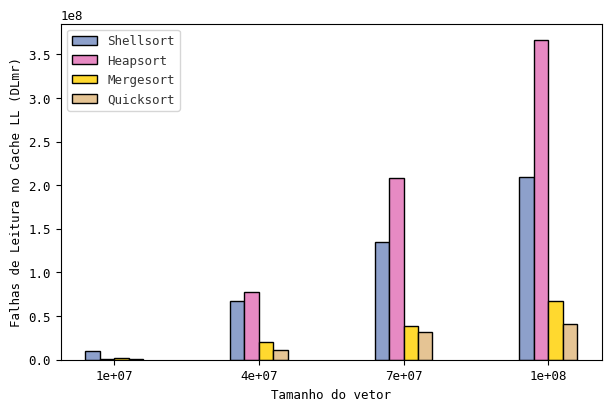

In [ ]:
# LL Data Read Miss  (DLmr)
tamanhos = (10000000, 40000000, 70000000, 100000000)
resultados_DLmr = {
  'Shellsort': (10559532, 67534484, 134852743, 209724224),
  'Heapsort': (812209, 77340348, 208086314, 366855035),
  'Mergesort': (2467075, 20052168, 39112929, 67156550),
  'Quicksort': (1102519, 11051010, 31459610, 41004205)
}
imprime_resultados_cache(
  tamanhos=tamanhos,
  resultados=resultados_DLmr,
  ylabel='Falhas de Leitura no Cache LL (DLmr)',
  saida='superiores_DLmr.pdf'
)

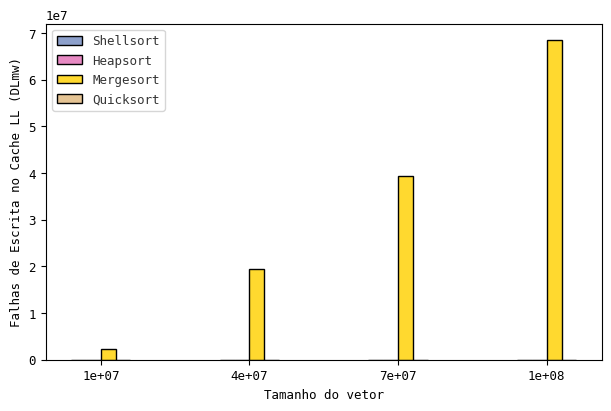

In [ ]:
# LL Data Write Miss (DLmw)
tamanhos = (10000000, 40000000, 70000000, 100000000)
resultados_DLmr = {
  'Shellsort': (0, 0, 0, 0),
  'Heapsort': (0, 0, 0, 0),
  'Mergesort': (2281456, 19378095, 39375172, 68626046),
  'Quicksort': (10, 52, 140, 159)
}
imprime_resultados_cache(
  tamanhos=tamanhos,
  resultados=resultados_DLmr,
  ylabel='Falhas de Escrita no Cache LL (DLmw)',
  saida='superiores_DLmw.pdf'
)

## Quicksort e Métodos Híbridos

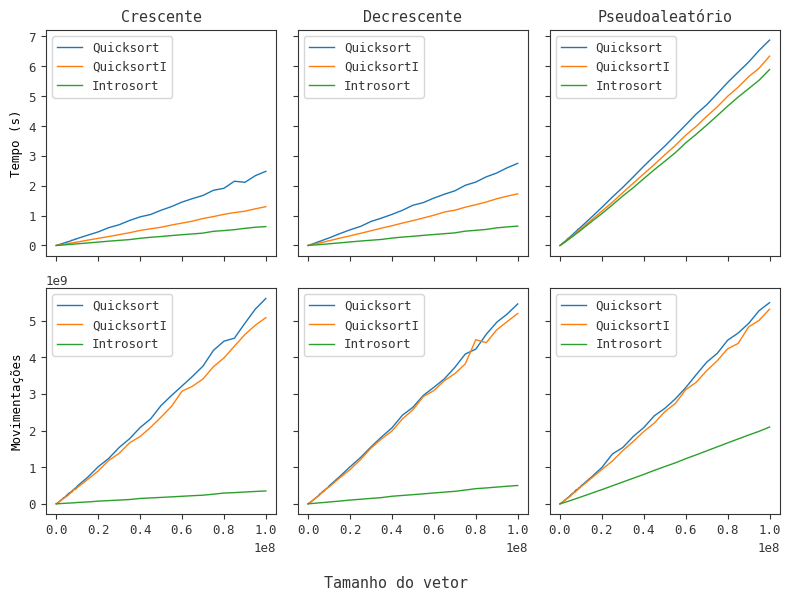

In [ ]:
hibridos_grupos = [[['Quicksort'], ['QuicksortI'], ['Introsort']]] * 3
plot_xy_2_3(
  grupos1 = hibridos_grupos,
  grupos2 = hibridos_grupos,
  ydata1 = 'tempo',
  ydata2 = 'movimentacoes',
  ylabel1 = 'Tempo (s)',
  ylabel2 = 'Movimentações',
  filename = f'hibridos.pdf',
  df = df_sup_1e4_1e8
)

## Métodos Lineares

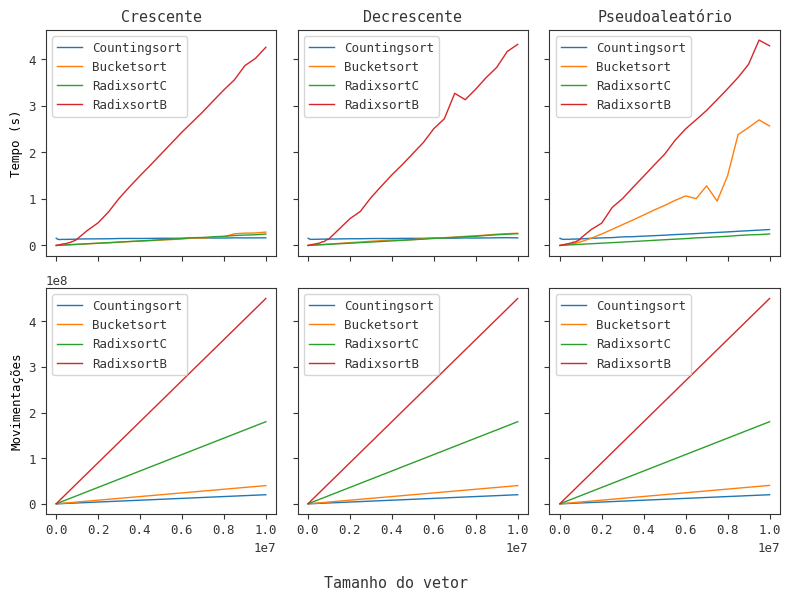

In [ ]:
plot_xy_2_3(
  grupos1 = [[['Countingsort'], ['Bucketsort'], ['RadixsortC'], ['RadixsortB']]] * 3,
  grupos2 = [[['Countingsort'], ['Bucketsort'], ['RadixsortC'], ['RadixsortB']]] * 3,
  ydata1 = 'tempo',
  ydata2 = 'movimentacoes',
  ylabel1 = 'Tempo (s)',
  ylabel2 = 'Movimentações',
  filename = f'lineares.pdf',
  df = df_geral
)

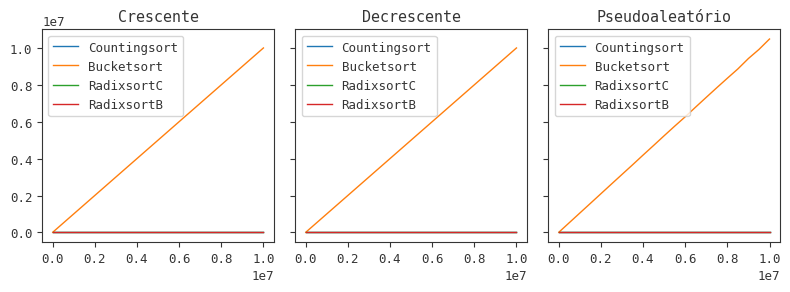

In [ ]:
lin_grupos = [[['Countingsort'], ['Bucketsort'], ['RadixsortC'], ['RadixsortB']]] * 3
plot_xy(titulo='Métodos Lineares', grupos=lin_grupos, ydata='comparacoes', df=df_geral)

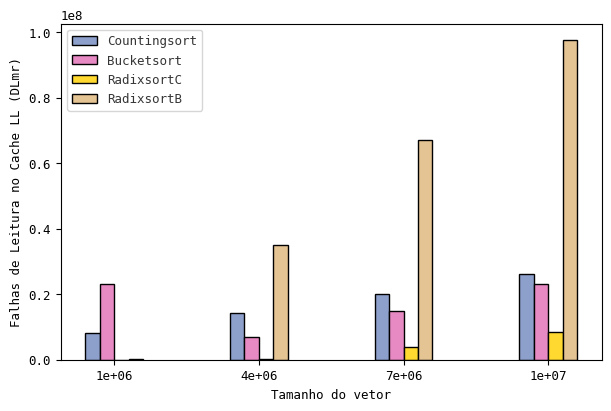

In [ ]:
# LL Data Read Miss  (DLmr)
tamanhos = (1000000, 4000000, 7000000, 10000000)
resultados_DLmr = {
  'Countingsort': (8167561, 14144617, 20129889, 26104652),
  'Bucketsort': (23246493, 7058317, 14983661, 23020517),
  'RadixsortC': (6062, 250002, 3927194, 8609114),
  'RadixsortB': (226853, 35106972, 67163199, 97727354)
}
imprime_resultados_cache(
  tamanhos=tamanhos,
  resultados=resultados_DLmr,
  ylabel='Falhas de Leitura no Cache LL (DLmr)',
  saida='lineares_DLmr.pdf'
)

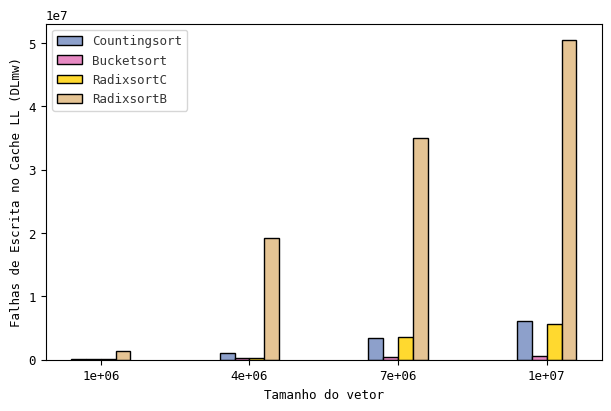

In [ ]:
# LL Data Write Miss (DLmw)
tamanhos = (1000000, 4000000, 7000000, 10000000)
resultados_DLmr = {
  'Countingsort': (62726, 1012519, 3392979, 6155601),
  'Bucketsort': (40015, 239330, 427432, 615646),
  'RadixsortC': (62499, 249999, 3551064, 5625091),
  'RadixsortB': (1327308, 19193033, 34941193, 50546521)
}
imprime_resultados_cache(
  tamanhos=tamanhos,
  resultados=resultados_DLmr,
  ylabel='Falhas de Escrita no Cache LL (DLmw)',
  saida='lineares_DLmw.pdf'
)

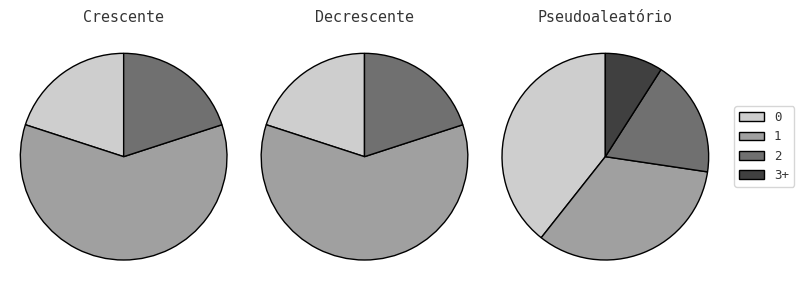

In [ ]:
imprime_frequencia_de_tamanhos_buckets()

## Misc

Visualização do vetor H-Ordenado para diferentes valores de H

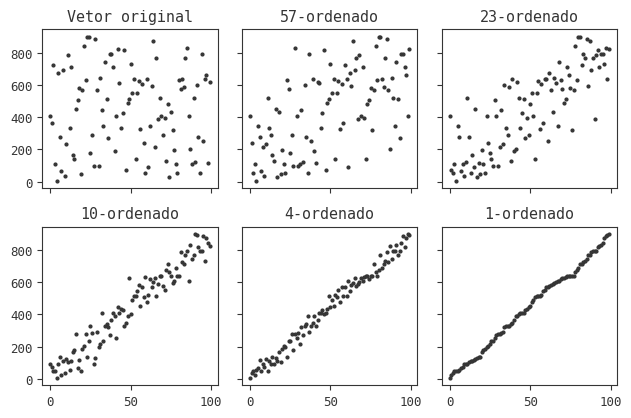

In [ ]:
imprime_shellsort_progrecao_h()

Número de movimentações do Quicksort e do Insercao para vetores pequenos

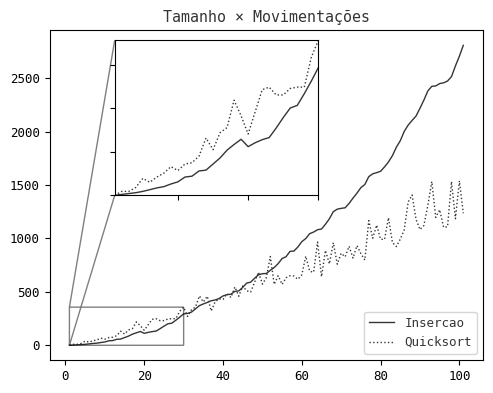

In [ ]:
imprime_quicksort_insercao_comparacao()

Número de movimentações do ParticionaAleatorio e ParticionaMediana

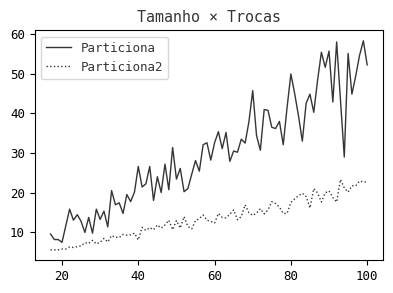

In [ ]:
imprime_particiona_comparacao()

In [ ]:
x = np.linspace(1, 10000, 1000)
f_linear = x
f_nlogn = x * np.log2(x)
f_quadratica = x**2

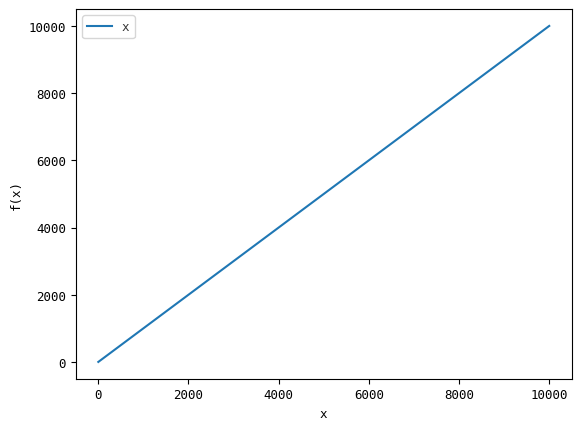

In [ ]:
plot_xfxlabel(x, f_linear, 'x')

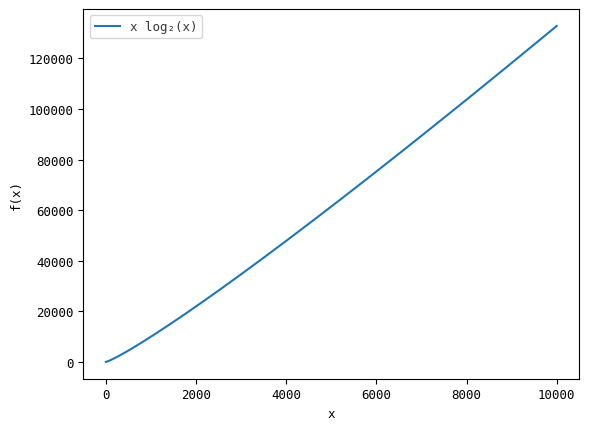

In [ ]:
plot_xfxlabel(x, f_nlogn, 'x log₂(x)')

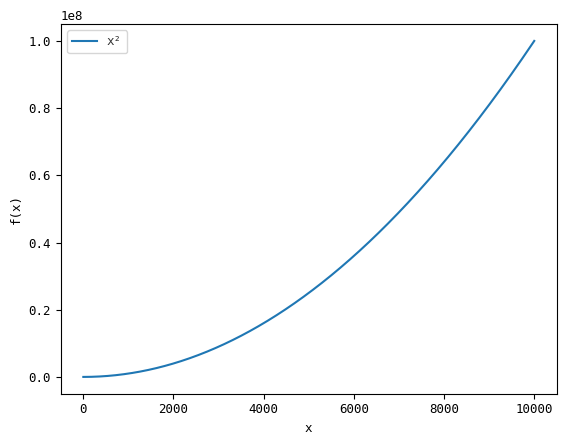

In [ ]:
plot_xfxlabel(x, f_quadratica, 'x²')